In [1]:
import pandas as pd

In [2]:
#pip install scikit-learn==1.0.0
#pip install statsmodels==0.12.2

In [4]:
from nsepy import get_history as gh
import datetime as dt
import yfinance as yf
stock_symbol = "RELIANCE.NS"  #NSE stocks usually end with .NS
#download stock data
stk_data = yf.download(stock_symbol,start="2023-01-01",end="2023-07-01")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [5]:
stk_data

Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2023-01-02,1184.592896,1186.018524,1171.854325,1172.682090,5316175
2023-01-03,1175.924194,1183.259245,1171.670422,1179.603215,7658932
2023-01-04,1158.219116,1177.763846,1156.126654,1175.901284,9264891
2023-01-05,1156.149658,1166.427926,1151.527923,1160.495513,13637099
2023-01-06,1166.657715,1171.739373,1158.104068,1161.944019,6349597
...,...,...,...,...,...
2023-06-23,1156.471558,1165.048194,1155.206860,1162.978723,6628570
2023-06-26,1147.641968,1156.770489,1144.491840,1152.907547,12641159


In [6]:
stk_data=stk_data[["Open","High","Low","Close"]]


In [7]:
stk_data

Price,Open,High,Low,Close
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,
2023-01-02,1172.682090,1186.018524,1171.854325,1184.592896
2023-01-03,1179.603215,1183.259245,1171.670422,1175.924194
2023-01-04,1175.901284,1177.763846,1156.126654,1158.219116
2023-01-05,1160.495513,1166.427926,1151.527923,1156.149658
2023-01-06,1161.944019,1171.739373,1158.104068,1166.657715
...,...,...,...,...
2023-06-23,1162.978723,1165.048194,1155.206860,1156.471558
2023-06-26,1152.907547,1156.770489,1144.491840,1147.641968


In [8]:
#time series always for univariate - single column oly
column="Close"

In [38]:
#StandardScaler or Normalisation or standardisation = x-u/std dev for ML
#MinMaxScaler - time series 

from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()    #used to scale your features to a specific range (default: 0 to 1).
#stk_data[[column]]: fit(): Calculates the min and max values from that column.transform(): Uses these values to scale each value x using: formula
#The result is a NumPy array, with all values scaled between 0 and 1..
#Learns the scaling parameters from the data,Then applies the transformation immediately.
data1= Ms.fit_transform(stk_data[[column]])
print("Len:",data1.shape)

Len: (122, 1)


In [10]:
len(data1)

122

In [11]:
#should split in an series or orderly manner
# input is our output both are same
training_size = round(len(data1 ) * 0.80)
print(training_size)
X_train=data1[:training_size]  #[start(empty means it takes from o) : end (takes till 1780) ]
X_test=data1[training_size:]   #[continuity from 1781:2225 - till last]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

98
X_train length: (98, 1)
X_test length: (24, 1)
y_train length: (98, 1)
y_test length: (24, 1)


In [12]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#!pip install statsmodels
#!pip install --upgrade scikit-learn


In [ ]:
import sklearn
import sklearn.metrics

print("Scikit-learn version:", sklearn.__version__)
print("mean_squared_error location:", sklearn.metrics.mean_squared_error.__module__)

In [44]:
import numpy as np
from sklearn.metrics import mean_squared_error  #best suited for times series
trends=['n','t','c','ct']  #'n' = no trend,'c' = constant only,'t' = linear trend,'ct' = constant + linear trend
lags=[1,2,3,4]
from statsmodels.tsa.ar_model import AutoReg #autoreg (lag)  #ML - scikit-learn, time series - statsmodels
for i in lags:
    #print(i)
   
    for td in trends:
        
        #print(td)
        #trendslist.append(td)
        model = AutoReg(X_train, lags=i,trend=td)
        model_fit = model.fit()  #This fits the model (i.e., trains it) using the provided training data (X_train)
        # make prediction:len(X_train) is the start of the prediction range (just after the training set).
        #len(data1) - 1 is the end index for prediction.data1 is likely your full time series (including train + test).
        #eg: X_train has 100 time points.data1 has 120 time points.This predicts values for time points 100 to 119 — i.e., the next 20 steps.
        y_pred= model_fit.predict(len(X_train), len(data1)-1)
        #print(y_pred)
        #mse=mean_squared_error(y_test, y_pred, squared=False)
        
        from stockFunctions1 import rmsemape
        print("Lag={},Trend={}".format(i,td))
        rmsemape(y_test,y_pred)
        print("************")
               

Lag=1,Trend=n
RMSE-Testset: 0.0428749277489463
maPe-Testset: 0.20437409800979092
************
Lag=1,Trend=t
RMSE-Testset: 0.0076209323345491145
maPe-Testset: 0.10202877832580248
************
Lag=1,Trend=c
RMSE-Testset: 0.05947647538105164
maPe-Testset: 0.24688733630213164
************
Lag=1,Trend=ct
RMSE-Testset: 0.006097104973623286
maPe-Testset: 0.08950074813195102
************
Lag=2,Trend=n
RMSE-Testset: 0.0391391830098363
maPe-Testset: 0.19468320972629416
************
Lag=2,Trend=t
RMSE-Testset: 0.008302249862883962
maPe-Testset: 0.1054545699710168
************
Lag=2,Trend=c
RMSE-Testset: 0.060926038009923446
maPe-Testset: 0.24965367640601308
************
Lag=2,Trend=ct
RMSE-Testset: 0.006645340702679778
maPe-Testset: 0.09038127298751197
************
Lag=3,Trend=n
RMSE-Testset: 0.029822605060011883
maPe-Testset: 0.17003116335286442
************
Lag=3,Trend=t
RMSE-Testset: 0.00812130951977818
maPe-Testset: 0.10445719807362364
************
Lag=3,Trend=c
RMSE-Testset: 0.05368239435099

In [ ]:
len(y_pred)

In [15]:
i=4
td='ct'
model = AutoReg(X_train, lags=i,trend=td)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(X_train), len(data1)-1)
#print(y_pred)
from sklearn.metrics import r2_score
mse=mean_squared_error(y_test,y_pred)
from stockFunctions1 import rmsemape
print("Lag={},Trend={}".format(i,td))
rmsemape(y_test,y_pred)
print("************")

Lag=4,Trend=ct
RMSE-Testset: 0.006402331791437374
maPe-Testset: 0.0922326990396891
************


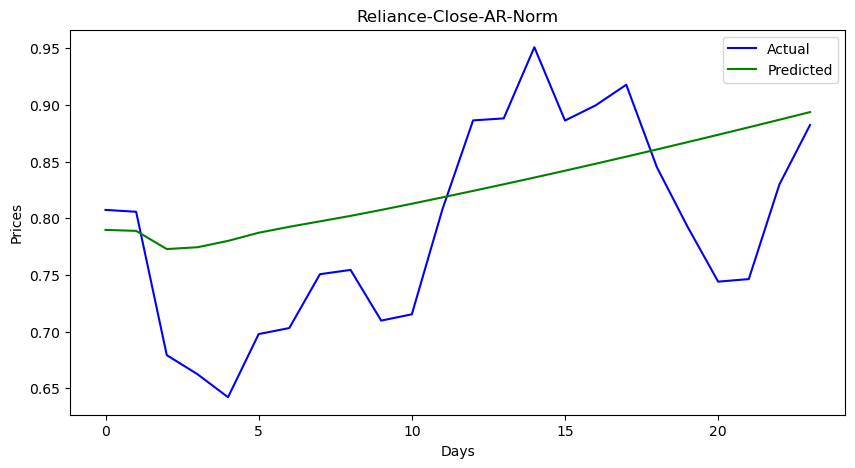

In [17]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","Reliance-Close-AR-Norm","Days","Prices")

In [18]:
len(data1)

122

In [19]:
y_test

array([[0.80735689],
       [0.80571411],
       [0.67918092],
       [0.66236924],
       [0.64201766],
       [0.69776288],
       [0.70307173],
       [0.75060103],
       [0.75439258],
       [0.70964554],
       [0.71520671],
       [0.80798904],
       [0.88636145],
       [0.88813106],
       [0.95095542],
       [0.88623462],
       [0.8996339 ],
       [0.91783671],
       [0.84502614],
       [0.79256782],
       [0.74402788],
       [0.74630349],
       [0.82985791],
       [0.88231623]])

In [20]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])

In [21]:
aTestNormTable

,Close
0,0.807357
1,0.805714
2,0.679181
3,0.662369
4,0.642018
5,0.697763
6,0.703072
7,0.750601
8,0.754393
9,0.709646


In [22]:
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)

In [23]:
actual_stock_price_test_ori

array([[1159.16174316],
       [1158.86291504],
       [1135.84606934],
       [1132.78796387],
       [1129.0859375 ],
       [1139.22619629],
       [1140.19189453],
       [1148.83764648],
       [1149.52734375],
       [1141.38769531],
       [1142.39929199],
       [1159.2767334 ],
       [1173.53295898],
       [1173.8548584 ],
       [1185.28283691],
       [1173.5098877 ],
       [1175.94726562],
       [1179.25842285],
       [1166.01391602],
       [1156.47155762],
       [1147.64196777],
       [1148.0559082 ],
       [1163.25476074],
       [1172.79711914]])

In [24]:
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [25]:
actual_stock_price_test_oriA

,Close
0,1159.161743
1,1158.862915
2,1135.846069
3,1132.787964
4,1129.085938
5,1139.226196
6,1140.191895
7,1148.837646
8,1149.527344
9,1141.387695


In [40]:
#inverse transform for y_test
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [41]:
#inverse transform for y_pred
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

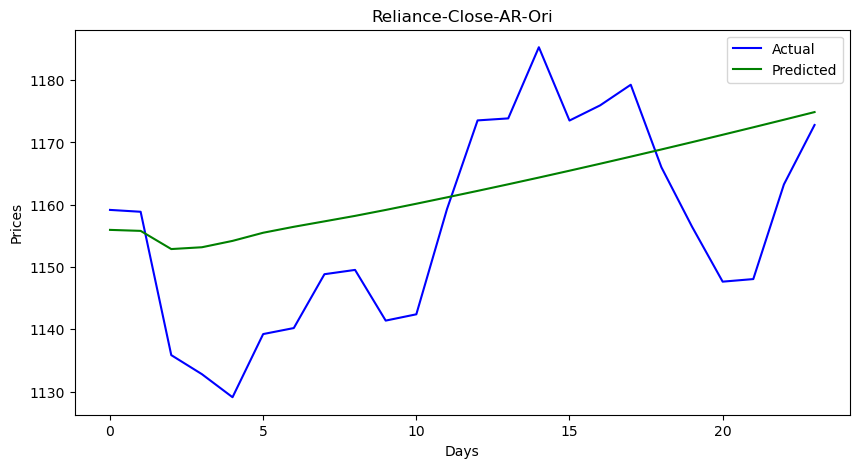

In [31]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","Reliance-Close-AR-Ori","Days","Prices")

In [30]:
from stockFunctions1 import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 211.8463018622317
maPe-Testset: 0.011018152538205301


In [32]:
forecast=model_fit.predict(len(data1), len(data1)+3)

In [33]:
forecast

array([0.90052094, 0.9074027 , 0.91434611, 0.92134806])

In [39]:
#inverse transform for forecast
from stockFunctions1 import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [35]:
forecast_stock_price_test_oriF

,Closefore
0,1176.108622
1,1177.36044
2,1178.623471
3,1179.89715


In [36]:
forecast_stock_price_test_oriF.to_csv("CloseAR.csv",index=False)

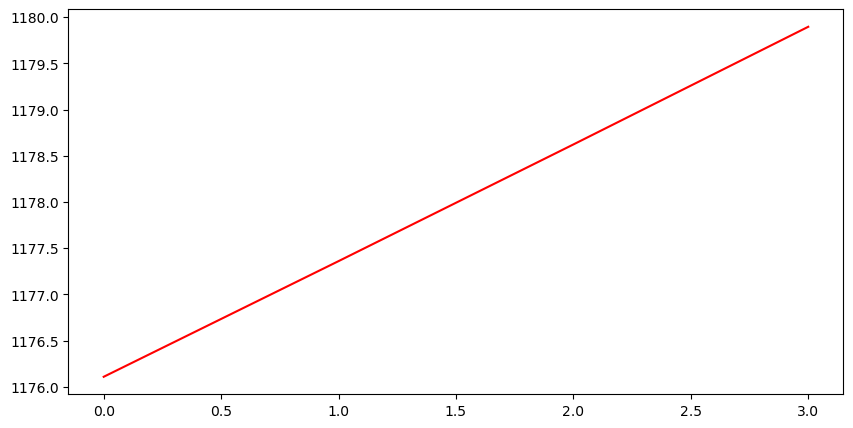

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(actual_stock_price_test_oriA[116:145], color = 'blue', label="Actual")
plt.plot(forecast_stock_price_test_oriF, color = 'red', label ="Predicted")